In [1]:
# Adapt this line to suit your need
import os
os.chdir('../')

In [2]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np


#.py
from core import qlearning as q 

In [3]:
aggregated_agents = []
for nb_players in [2, 3, 4, 5]:
    total_rewards = []

    for loop in range(1):
        print("Loop:", loop)
        agents = [q.Agent(nb_player=nb_players) for _ in range(nb_players)]
        env = q.Env(nb_players=nb_players)

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(6):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].S, agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 0
Loop: 0
Loop: 0


In [3]:
aggregated_agents

[array([[0.23110774, 0.29013613],
        [0.14621435, 0.32968355],
        [0.30422537, 0.31618247],
        [0.25725565, 0.33588754],
        [0.31643803, 0.26255152],
        [0.25229138, 0.34788975]]),
 array([[0.20869347, 0.12268466, 0.17092452],
        [0.22549479, 0.17344604, 0.23652909],
        [0.20198147, 0.16211461, 0.21647513],
        [0.21927584, 0.22327071, 0.15848423],
        [0.08042844, 0.19900112, 0.19347208],
        [0.20433268, 0.22426121, 0.17669658]]),
 array([[0.09509799, 0.14955561, 0.08399758, 0.11519541],
        [0.05472642, 0.10716542, 0.12456531, 0.08579271],
        [0.14465978, 0.08814225, 0.07757687, 0.13570909],
        [0.06119902, 0.10826302, 0.14941326, 0.12337604],
        [0.07011175, 0.09498978, 0.1736183 , 0.1177901 ],
        [0.12400731, 0.13757224, 0.10559886, 0.05312047]]),
 array([[0.09861979, 0.08887381, 0.07121279, 0.10336978, 0.10136547],
        [0.04332892, 0.08800291, 0.09330608, 0.13181176, 0.13845314],
        [0.17988592, 0.074

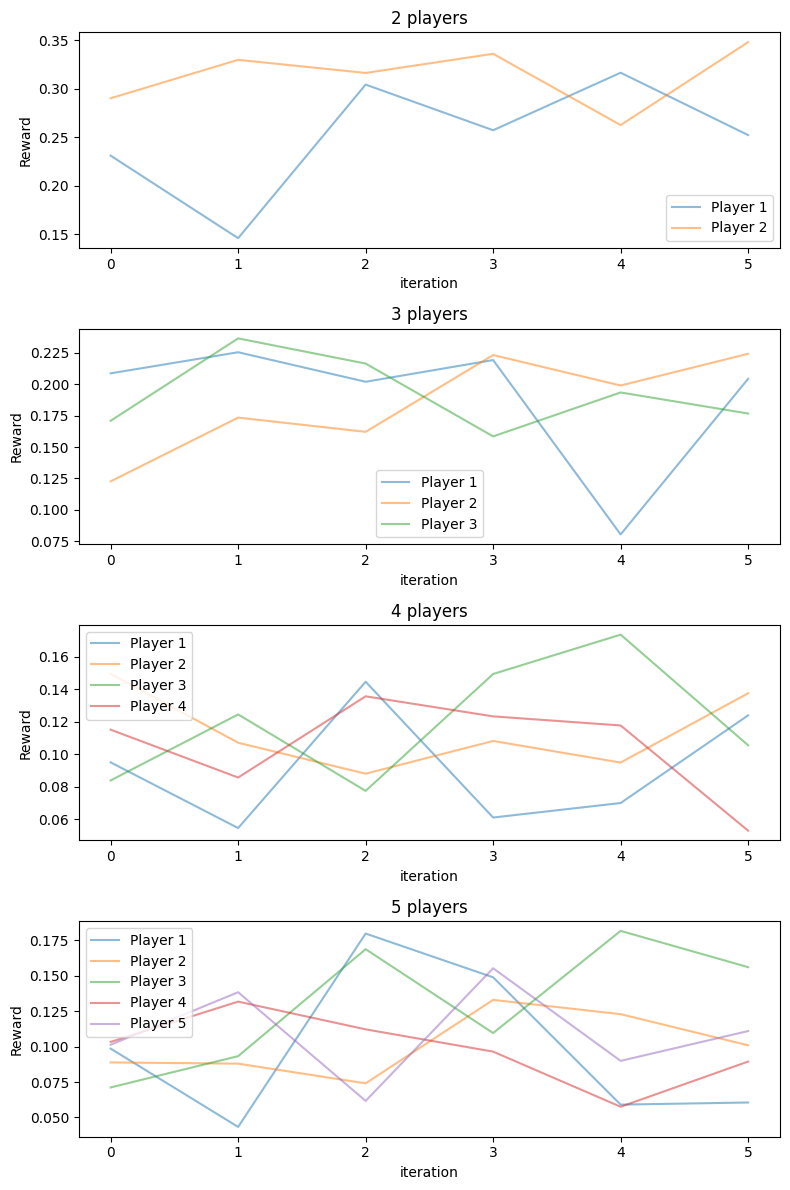

In [8]:
import matplotlib.pyplot as plt
import numpy as np


num_graphs = len(aggregated_agents)

# Créer une figure avec autant de sous-graphiques que de périodes
fig, axes = plt.subplots(nrows=num_graphs, figsize=(8, 12))

# Boucle pour itérer à travers les périodes et les sous-graphiques
for graphs in range(num_graphs):
    ax = axes[graphs]
    num_players = len(aggregated_agents[graphs][0])
    # Tracer les courbes pour chaque joueur dans le sous-graphique
    for player in range(num_players):
        ax.plot(aggregated_agents[graphs][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Titre du sous-graphique avec la période correspondante
    ax.set_title(f'{graphs+2} players')
    
    # Ajouter une légende pour chaque sous-graphique
    ax.legend()
    
    # Nommer les axes du sous-graphique
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [22]:
nb_players = 5
RN = []
RC = []
for i in range (2,nb_players+1):
    prices = res.PriceOptimizer(nb_players=i)
    collusion_profit, collusion_prices = prices.CollusionPrice()
    nash_profit, nash_prices = prices.NashPrice()
    RN.append(nash_profit)
    RC.append(collusion_profit)
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-2:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[ 0.54121218  0.72132228]
 [ 0.17144463  0.70460075]
 [ 0.13292279  0.29311104]
 [-0.01292532  0.46889204]]


[0.63126723 0.43802269 0.21301691 0.22798336]


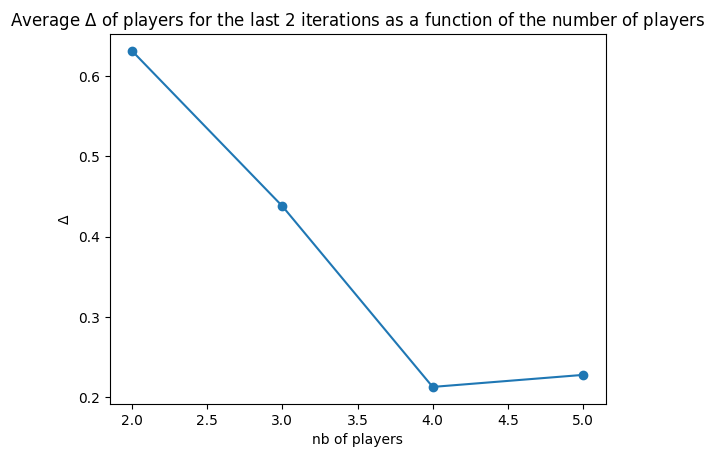

In [25]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([2,3,4,5],av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 2 iterations as a function of the number of players')
plt.show()